# Plot Mass spectometry

In [1]:
#load in plotting tools
import matplotlib.pyplot as plt
import seaborn as sns

#Load in analysis workhorses
import pandas as pd
import numpy as np

# Set the PBoC plotting style
from regseq.utils import pboc_style_mpl
#pboc_style_mpl()

For a more detailed explanation of the purpose of this notebook, refer to the [documentation of the regseq experiment](https://github.com/RPGroup-PBoC/regseq/wiki/5.-Mass-Spectrometry).<br>
First we load in the mass spectometry data.

In [2]:
df = pd.io.parsers.read_csv('../data/massspec/proteinGroups20June19.txt', sep='\t')
# Column name that contains the normal
inname = 'A5'
good_column = 'Ratio H/L normalized ' + inname
# Extract the only necessary columns, protein name and normalized ratio
enrichment = df[['Protein names',good_column]]

Remove any rows which don't actually have ratios (those proteins where we did not find enough peptides will have an NaN for enrichment)

In [3]:
enrichment2 = enrichment.dropna()
enrichment2.head()

,Protein names,Ratio H/L normalized A5
22,"6-phosphogluconate dehydrogenase, decarboxylating",9.47610
25,NADH dehydrogenase,0.39684
26,Superoxide dismutase [Mn],14.84700
27,Ribonucleoside-diphosphate reductase 1 subunit...,0.92589
28,Maltodextrin phosphorylase,4.08510


Sort the entries so that they go from highest enrichment to lowest.

In [4]:
enrichment2 = enrichment2.sort_values(by=good_column,ascending=False)
enrichment2.head()

,Protein names,Ratio H/L normalized A5
738,ABC transporter arginine-binding protein 1,40.932
441,Leu/Ile/Val-binding protein,24.829
674,Periplasmic dipeptide transport protein,24.088
872,Malate dehydrogenase,20.293
628,Thiosulfate-binding protein,19.558


We are looking for proteins that are binding DNA. The function below loads a file containing all genes which are encoding DNA binding genes, and returns a list of booleans if genes from the mass spec data are in this list.

In [5]:
def check_DNA(s):
    '''This function will return only those proteins which have DNA binding activity.'''
    with open('../data/massspec/DNAbinding_genenames.txt') as f:
        genenames = f.read()
        genenames = genenames.split(',\n')
    if s in genenames:
        return True
    else:
        return False

Now we can apply this function to the mass spectometry data, and find DNA binding proteins.

In [6]:
goodrows = enrichment2['Protein names'].apply(check_DNA)
enrichment3 = enrichment2[goodrows]

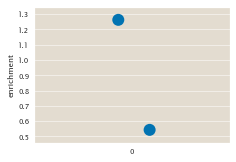

In [7]:
#plot results
fig,ax = plt.subplots()
ax.set_xlabel('')
ax.set_ylabel('enrichment')
sns.stripplot(data=list(enrichment3[good_column]),jitter=True,size=12)
plt.savefig(inname + '_output.eps', format='eps')


Finally, here are the versions of packages used in this notebook. To display the versions, we are using the Jupyter Lab extension `watermark`, which can be found [here](https://github.com/rasbt/watermark).

## Computing Environment

In [16]:
%load_ext watermark
%watermark -v -p jupyterlab,matplotlib,seaborn,pandas,numpy,regseq

CPython 3.6.10
IPython 7.13.0

jupyterlab 1.2.6
matplotlib 3.1.3
seaborn 0.10.0
pandas 1.0.3
numpy 1.18.1
RegSeq 0.0.1
